In [202]:
import pandas as pd 
import json
import requests 
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

In [306]:
d = pd.DataFrame(dict)

#How many number of pokemon do you want 
y = 150

for x in range(1,y+1):
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{x}/").json()
    i = r["id"]
    d.loc[x,"id"] = i
    n = r["name"]
    d.loc[x,"name"] = n
    t1 = r["types"][0]["type"]["name"]
    d.loc[x,"type 1"] = t1
    try:
        t2 = r["types"][1]["type"]["name"]
        d.loc[x,"type 2"] = t2
    except IndexError: 
        d.loc[x,"type 2"] = "na"
    h = r["height"]
    d.loc[x,"height"] = h
    b = r["stats"][0]["base_stat"]
    d.loc[x,"HP"] = b
    w = r["weight"]
    d.loc[x,"weight"] = w
    
d.head(20)

,id,name,type 1,type 2,height,HP,weight
1,1.0,bulbasaur,grass,poison,7.0,45.0,69.0
2,2.0,ivysaur,grass,poison,10.0,60.0,130.0
3,3.0,venusaur,grass,poison,20.0,80.0,1000.0
4,4.0,charmander,fire,na,6.0,39.0,85.0
5,5.0,charmeleon,fire,na,11.0,58.0,190.0
6,6.0,charizard,fire,flying,17.0,78.0,905.0
7,7.0,squirtle,water,na,5.0,44.0,90.0
8,8.0,wartortle,water,na,10.0,59.0,225.0
9,9.0,blastoise,water,na,16.0,79.0,855.0
10,10.0,caterpie,bug,na,3.0,45.0,29.0


In [239]:
d1 = pd.DataFrame(d.groupby(["type 1"])["HP"].mean())
d2 = d1.reset_index()
d2["HP"] = round(d2["HP"],1)
d2

,type 1,HP
0,bug,55.4
1,dragon,64.3
2,electric,54.4
3,fairy,82.5
4,fighting,63.6
5,fire,63.8
6,ghost,45.0
7,grass,65.0
8,ground,58.1
9,ice,77.5


<BarContainer object of 15 artists>

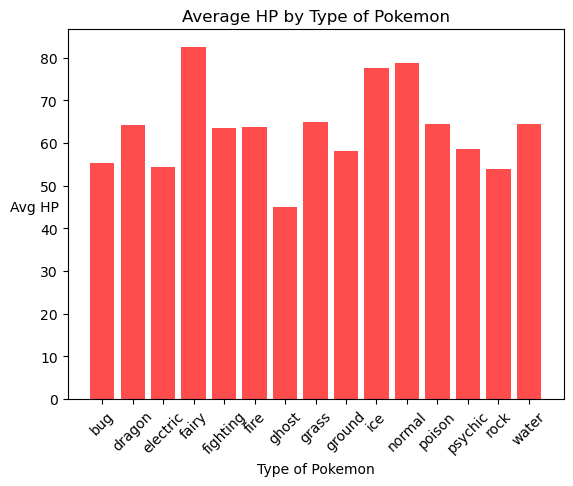

In [303]:
x_axis = d2["type 1"]
y_axis = d2["HP"]
plt.xticks(rotation = 45)
plt.title("Average HP by Type of Pokemon")
plt.xlabel("Type of Pokemon")
plt.ylabel("Avg HP",rotation=0)
plt.bar(x_axis,y_axis, color = "r", alpha = .7)

In [241]:
f = pd.DataFrame(d["type 1"].value_counts())
f2 = f.reset_index()
f2
f2.rename(columns = {"type 1":"count", "index":"type 1"}, inplace = True)
f2

,type 1,count
0,water,28
1,normal,22
2,poison,14
3,grass,12
4,fire,12
5,bug,12
6,electric,9
7,rock,9
8,ground,8
9,fighting,7


In [242]:
new = pd.merge(d2, f2, on = ["type 1"])
new["Frequency %"] = round(100*(new["count"]/d["type 1"].count()), 1)
new1 = new.sort_values("Frequency %", ascending = False)
new1

,type 1,HP,count,Frequency %
14,water,64.5,28,18.7
10,normal,78.7,22,14.7
11,poison,64.5,14,9.3
0,bug,55.4,12,8.0
5,fire,63.8,12,8.0
7,grass,65.0,12,8.0
2,electric,54.4,9,6.0
13,rock,53.9,9,6.0
8,ground,58.1,8,5.3
4,fighting,63.6,7,4.7


<BarContainer object of 15 artists>

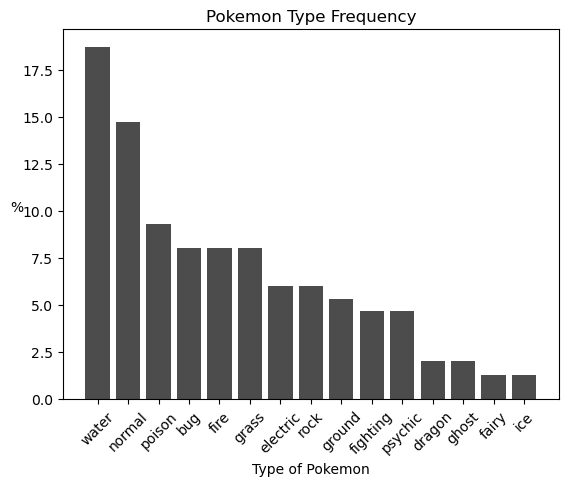

In [305]:
plt.xticks(rotation = 45)
plt.xlabel("Type of Pokemon")
plt.title("Pokemon Type Frequency")
plt.ylabel("%", rotation = 0)
plt.bar(new1["type 1"],new1["Frequency %"], color = "k", alpha = .7)